# Explorative Datenanalyse aller Abstimmungen der Schweiz

## Importiere notwendige Bibliotheken

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Datensatz laden

In [18]:
# Lade den Datensatz
# Verwende Semikolon als Trennzeichen, da das Datenformat dies verwendet
df = pd.read_csv('./Data/dataset.csv', sep=';', low_memory=False)

## Informationen über den Datensatz

In [19]:
# Zeige grundlegende Informationen über den Datensatz
print(f"Datensatzgröße: {df.shape}")
print("\nErste Zeilen:")
display(df.head())

# Prüfe auf fehlende Werte in Schlüsselspalten
print("\nFehlende Werte in Schlüsselspalten:")
key_columns = ['anr', 'datum', 'titel_kurz_d', 'annahme', 'volkja-proz']
display(df[key_columns].isna().sum())

Datensatzgröße: (696, 874)

Erste Zeilen:


,anr,datum,titel_kurz_d,titel_kurz_f,titel_kurz_e,titel_off_d,titel_off_f,stichwort,swissvoteslink,anzahl,...,bkresults-fr,bfsdash-de,bfsdash-fr,bfsdash-en,bfsmap-de,bfsmap-fr,bfsmap-en,nach_cockpit_d,nach_cockpit_f,nach_cockpit_e
0,1.0,12.09.1848,Bundesverfassung der schweizerischen Eidgenoss...,Constitution fédérale de la Confédération suisse,Federal Constitution of the Swiss Confederation,Totalrevision vom 12. September 1848,Révision totale du 12 septembre 1848,.,https://swissvotes.ch/vote/1.00,1,...,https://www.bk.admin.ch/ch/f/pore/va/18480606/...,.,.,.,NaN,NaN,.,.,.,.
1,2.0,14.01.1866,Mass und Gewicht,Poids et mesures,Weights and measures,Festsetzung von Mass und Gewicht,Poids et mesures,.,https://swissvotes.ch/vote/2.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
2,3.0,14.01.1866,Gleichstellung der Juden und Naturalisierten m...,Egalité des Juifs,Equal rights for Jews and naturalised citizens...,Gleichstellung der Juden und Naturalisierten m...,Egalité des citoyens au point de vue de l'étab...,.,https://swissvotes.ch/vote/3.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
3,4.0,14.01.1866,Stimmrecht der Niedergelassenen in Gemeindeang...,"Droit de vote des Suisses établis, en matière ...",Swiss residents' right to vote in communal mat...,Stimmrecht der Niedergelassenen in Gemeindeang...,"Droit de vote des Suisses établis, en matière ...",.,https://swissvotes.ch/vote/4.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
4,5.0,14.01.1866,Besteuerung und zivilrechtliche Verhältnisse d...,Impôts et rapports civils des Suisses établis,Taxation and civil law status of Swiss residents,Besteuerung und zivilrechtliche Verhältnisse d...,Impôts et rapports civils des Suisses établis,.,https://swissvotes.ch/vote/5.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.



Fehlende Werte in Schlüsselspalten:


anr             0
datum           0
titel_kurz_d    0
annahme         0
volkja-proz     0
dtype: int64

## Datensatz vorbereiten

In [20]:
# Setze Stil für bessere Visualisierungen
plt.style.use('default')
sns.set_palette("colorblind")

# Konvertiere Datumsspalte in datetime-Format
df['datum'] = pd.to_datetime(df['datum'], format='%d.%m.%Y', errors='coerce')
df['year'] = df['datum'].dt.year

# Erstelle eine Zeitraumspalte für die Analyse
def assign_period(year):
    if pd.isna(year):
        return np.nan
    elif year < 1920:
        return "1893-1919"
    elif year < 1950:
        return "1920-1949"
    elif year < 1980:
        return "1950-1979"
    elif year < 2010:
        return "1980-2009"
    else:
        return "2010-2025"

df['period'] = df['year'].apply(assign_period)

## Grundlegende Statistik zur Übersicht


Abstimmungsergebnisse nach Zeitraum:


,period,mean,median,count
0,1893-1919,51.782875,49.965,80
1,1920-1949,45.780833,44.760,72
2,1950-1979,53.089936,52.770,157
3,1980-2009,49.791373,49.910,255
4,2010-2025,47.470379,46.945,132


C:\Users\fabud\AppData\Local\Temp\ipykernel_39204\1818051978.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x='year', y='volkja-proz', estimator='mean', ci=95)


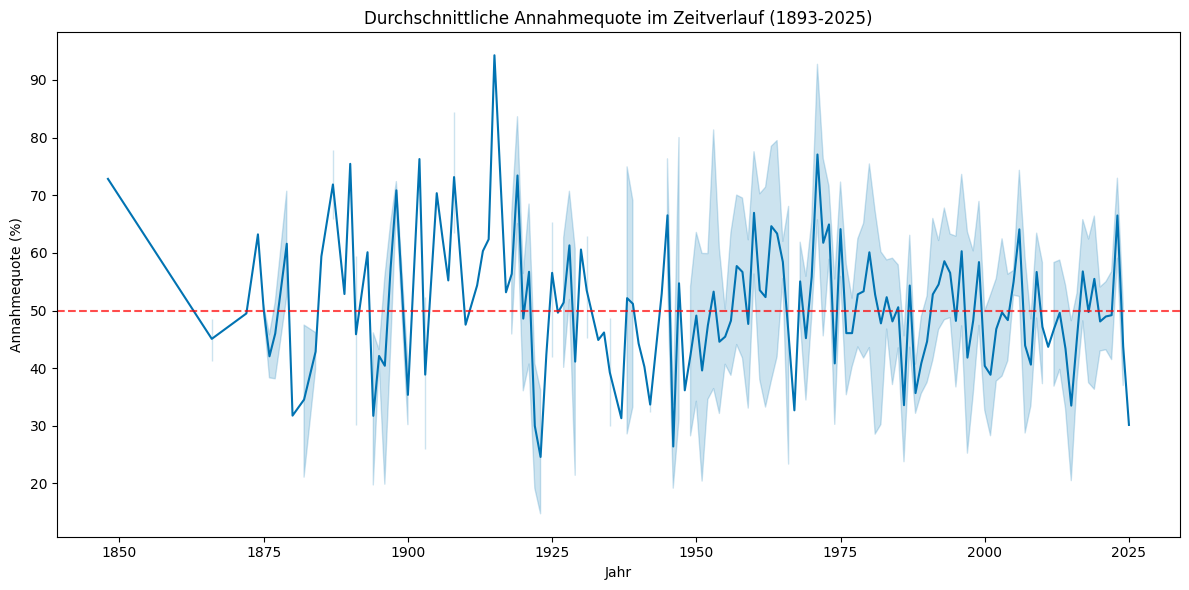

In [21]:
# Grundlegende Statistiken zu Abstimmungsergebnissen im Zeitverlauf
print("\nAbstimmungsergebnisse nach Zeitraum:")
period_stats = df.groupby('period')['volkja-proz'].agg(['mean', 'median', 'count']).reset_index()
display(period_stats)

# Visualisiere den Trend der Annahmequoten im Zeitverlauf
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='volkja-proz', estimator='mean', ci=95)
plt.title('Durchschnittliche Annahmequote im Zeitverlauf (1893-2025)')
plt.xlabel('Jahr')
plt.ylabel('Annahmequote (%)')
plt.axhline(y=50, color='r', linestyle='--', alpha=0.7)  # 50% Schwellenlinie
plt.tight_layout()
plt.show()

## Identifiziere gesellschaftsorientierte Abstimmungen
Wir müssen definieren, was "gesellschaftsorientierte" Abstimmungen ausmacht
Dies könnte auf Schlüsselwörtern in den Titeln oder bestimmten Kategorien basieren

In [22]:
# Erster Ansatz: Suche nach Schlüsselwörtern zu sozialen Themen
social_keywords = ['gesellschaft', 'sozial', 'frauen', 'ehe', 'familie', 
                  'bildung', 'gesundheit', 'migration', 'ausländer', 
                  'gleichstellung', 'religion', 'kultur']

# Erstelle eine Funktion zur Identifizierung gesellschaftsorientierter Abstimmungen
def is_society_oriented(row):
    title = str(row['titel_kurz_d']).lower() + ' ' + str(row['titel_off_d']).lower()
    return any(keyword in title for keyword in social_keywords)

df['society_oriented'] = df.apply(is_society_oriented, axis=1)

## Vergleiche Annahmequoten zwischen gesellschaftsorientierten und anderen Abstimmungen im Zeitverlauf

<Figure size 1200x600 with 0 Axes>

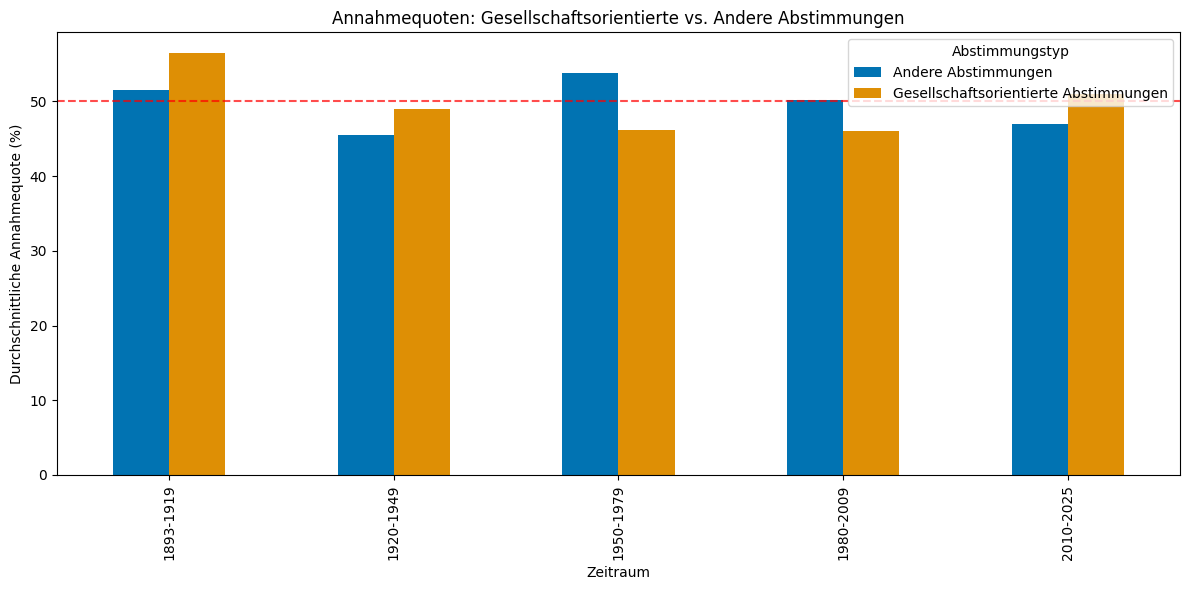

In [23]:
society_vs_other = df.groupby(['period', 'society_oriented'])['volkja-proz'].mean().reset_index()
society_vs_other_pivot = society_vs_other.pivot(index='period', columns='society_oriented', values='volkja-proz')
society_vs_other_pivot.columns = ['Andere Abstimmungen', 'Gesellschaftsorientierte Abstimmungen']

plt.figure(figsize=(12, 6))
society_vs_other_pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Annahmequoten: Gesellschaftsorientierte vs. Andere Abstimmungen')
plt.xlabel('Zeitraum')
plt.ylabel('Durchschnittliche Annahmequote (%)')
plt.axhline(y=50, color='r', linestyle='--', alpha=0.7)
plt.legend(title='Abstimmungstyp')
plt.tight_layout()
plt.show()

## Analysiere den Trend der Annahme für gesellschaftsorientierte Abstimmungen im Zeitverlauf

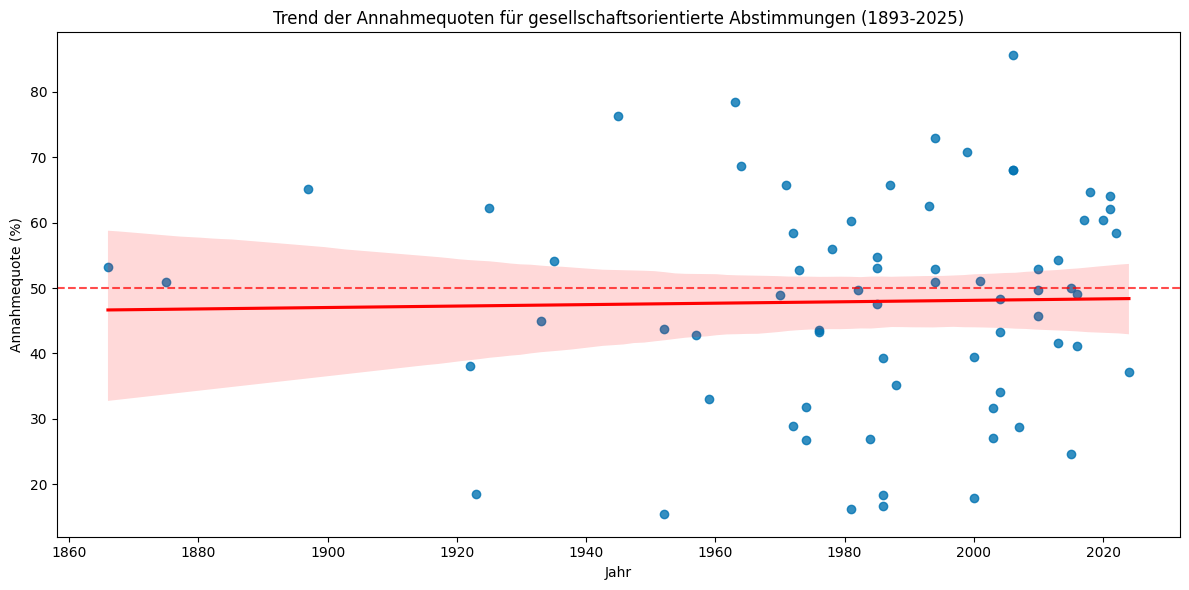

In [24]:
society_votes = df[df['society_oriented'] == True]
plt.figure(figsize=(12, 6))
sns.regplot(data=society_votes, x='year', y='volkja-proz', scatter=True, line_kws={"color":"red"})
plt.title('Trend der Annahmequoten für gesellschaftsorientierte Abstimmungen (1893-2025)')
plt.xlabel('Jahr')
plt.ylabel('Annahmequote (%)')
plt.axhline(y=50, color='r', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analysiere kantonale Unterschiede im Abstimmungsverhalten bei gesellschaftsorientierten Abstimmungen

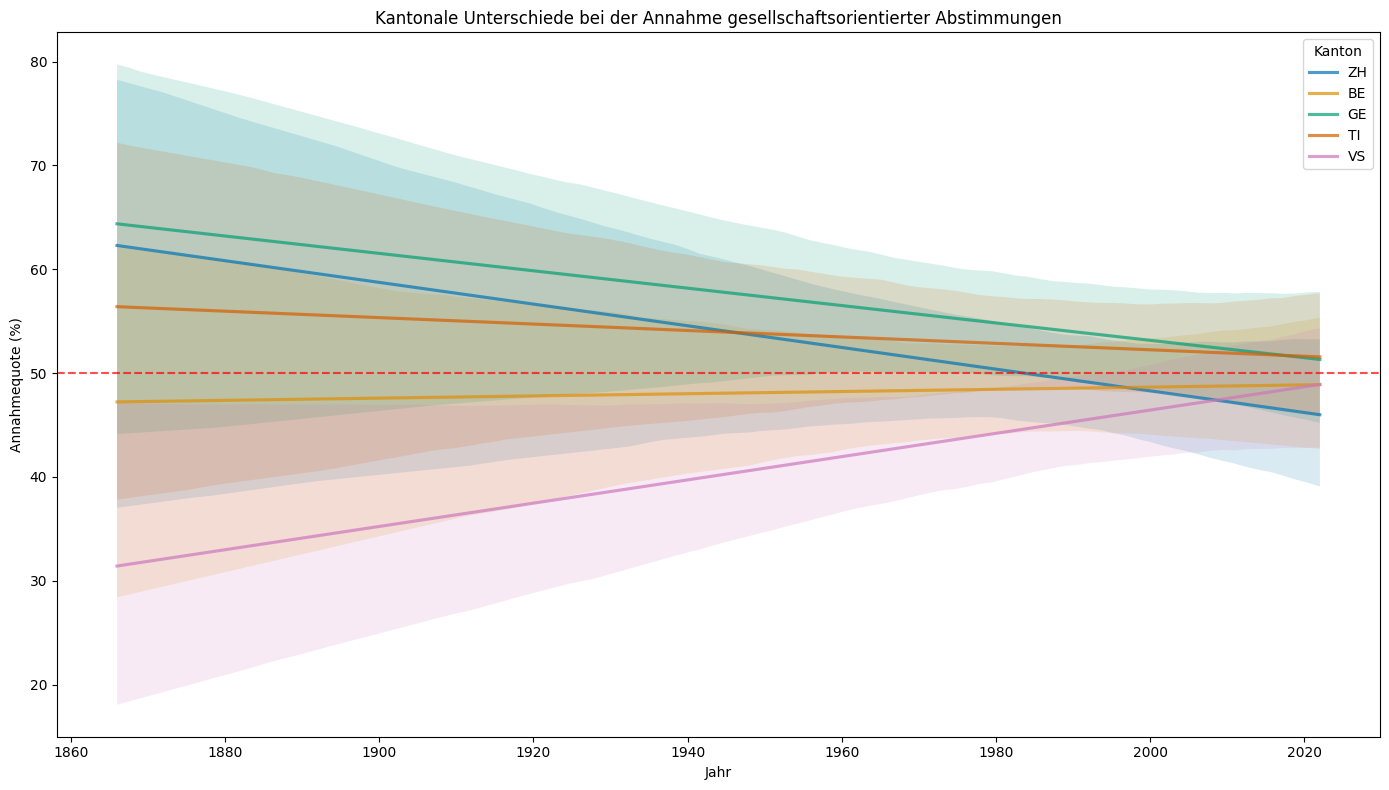

In [26]:
# Wähle einige repräsentative Kantone für den Vergleich
cantons = ['zh', 'be', 'ge', 'ti', 'vs']
canton_cols = [f'{canton}-japroz' for canton in cantons]

# Erstelle einen Dataframe mit kantonalen Annahmequoten für gesellschaftsorientierte Abstimmungen
canton_data = society_votes[['year'] + canton_cols].copy()

# Konvertiere die kantonalen Ja-Prozent-Spalten zu numerischen Werten
for col in canton_cols:
    # Konvertiere zu numerischen Werten und ersetze Fehler mit NaN
    canton_data[col] = pd.to_numeric(canton_data[col], errors='coerce')

# Entferne Zeilen mit fehlenden Werten
canton_data = canton_data.dropna()

# Überprüfe, ob Daten vorhanden sind
if len(canton_data) > 0:
    # Plotte kantonale Unterschiede im Zeitverlauf
    plt.figure(figsize=(14, 8))
    for canton in cantons:
        sns.regplot(data=canton_data, x='year', y=f'{canton}-japroz', 
                    label=canton.upper(), scatter=False, line_kws={"alpha":0.7})
    
    plt.title('Kantonale Unterschiede bei der Annahme gesellschaftsorientierter Abstimmungen')
    plt.xlabel('Jahr')
    plt.ylabel('Annahmequote (%)')
    plt.axhline(y=50, color='r', linestyle='--', alpha=0.7)
    plt.legend(title='Kanton')
    plt.tight_layout()
    plt.show()
else:
    print("Keine ausreichenden Daten für kantonale Vergleiche vorhanden.")

## Analysiere die Beziehung zwischen politischen Parteipositionen und Abstimmungsergebnissen
Dies erfordert die Identifizierung der Spalten, die Parteipositionen enthalten

Analysiere liberale vs. konservative Parteipositionen bei gesellschaftsorientierten Abstimmungen

C:\Users\fabud\AppData\Local\Temp\ipykernel_39204\365098232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  society_votes[party] = pd.to_numeric(society_votes[party], errors='coerce')
C:\Users\fabud\AppData\Local\Temp\ipykernel_39204\365098232.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  society_votes['liberal_support'] = society_votes[available_liberal_parties].mean(axis=1)
C:\Users\fabud\AppData\Local\Temp\ipykernel_39204\365098232.py:21: SettingWithCopyWarning: 
A value is trying to be set on

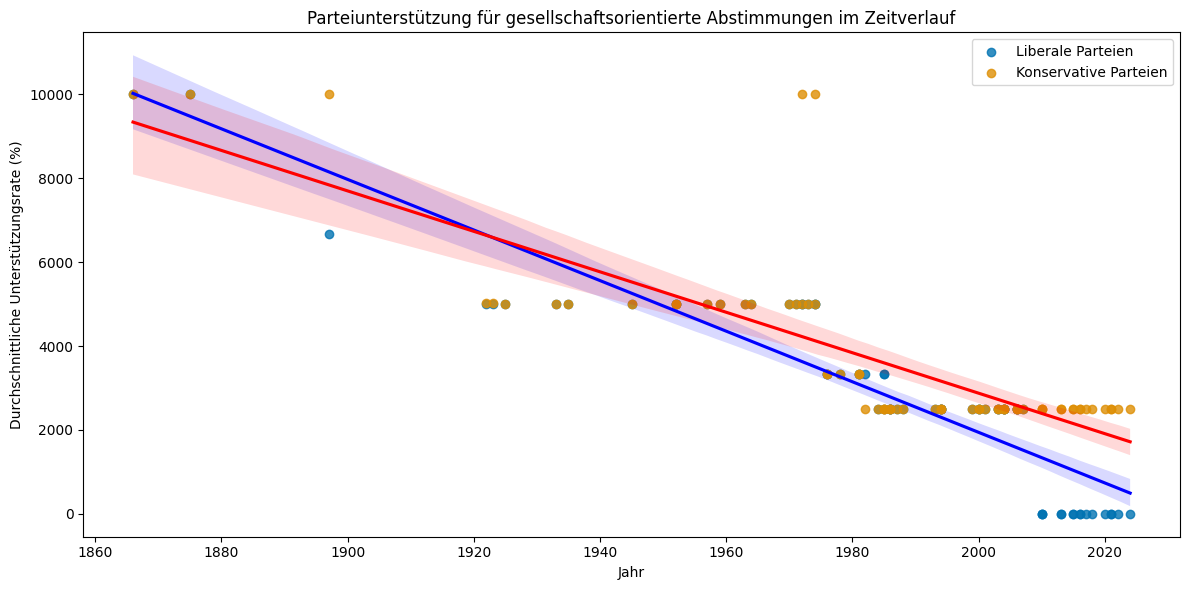

In [ ]:
# Definiere liberale und konservative Parteien
liberal_parties = ['p-fdp', 'p-glp', 'p-gps', 'p-sps']
conservative_parties = ['p-svp', 'p-cvp', 'p-mitte', 'p-edu']

# Konvertiere die Parteispalten zu numerischen Werten
for party in liberal_parties + conservative_parties:
    if party in society_votes.columns:
        society_votes.loc[:, party] = pd.to_numeric(society_votes[party], errors='coerce')

# Berechne durchschnittliche Unterstützung von liberalen und konservativen Parteien für gesellschaftsorientierte Abstimmungen
# Verwende nur die Spalten, die tatsächlich im DataFrame vorhanden sind
available_liberal_parties = [p for p in liberal_parties if p in society_votes.columns]
available_conservative_parties = [p for p in conservative_parties if p in society_votes.columns]

if available_liberal_parties:
    society_votes.loc[:, 'liberal_support'] = society_votes[available_liberal_parties].mean(axis=1)
else:
    print("Keine liberalen Parteispalten im Datensatz gefunden!")
    
if available_conservative_parties:
    society_votes.loc[:, 'conservative_support'] = society_votes[available_conservative_parties].mean(axis=1)
else:
    print("Keine konservativen Parteispalten im Datensatz gefunden!")

# Überprüfe, ob beide Unterstützungswerte berechnet wurden
if 'liberal_support' in society_votes.columns and 'conservative_support' in society_votes.columns:
    # Plotte den Trend der Parteiunterstützung für gesellschaftsorientierte Abstimmungen
    plt.figure(figsize=(12, 6))
    sns.regplot(data=society_votes, x='year', y='liberal_support', 
                label='Liberale Parteien', scatter=True, line_kws={"color":"blue"})
    sns.regplot(data=society_votes, x='year', y='conservative_support', 
                label='Konservative Parteien', scatter=True, line_kws={"color":"red"})
    plt.title('Parteiunterstützung für gesellschaftsorientierte Abstimmungen im Zeitverlauf')
    plt.xlabel('Jahr')
    plt.ylabel('Durchschnittliche Unterstützungsrate (%)')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Nicht genügend Daten für den Vergleich von Parteiunterstützung vorhanden.")

In [ ]:
# Berechne Korrelation zwischen Jahr und Annahmequote für gesellschaftsorientierte Abstimmungen
correlation, p_value = stats.pearsonr(society_votes['year'], society_votes['volkja-proz'])
print(f"\nKorrelation zwischen Jahr und Annahmequote für gesellschaftsorientierte Abstimmungen: {correlation:.4f}")
print(f"P-Wert: {p_value:.4f}")

if p_value < 0.05:
    if correlation > 0:
        print("Es gibt eine statistisch signifikante positive Korrelation zwischen Zeit und Annahmequoten für gesellschaftsorientierte Abstimmungen.")
        print("Dies unterstützt die Hypothese, dass liberales Abstimmungsverhalten im Laufe der Zeit zugenommen hat.")
    else:
        print("Es gibt eine statistisch signifikante negative Korrelation zwischen Zeit und Annahmequoten für gesellschaftsorientierte Abstimmungen.")
        print("Dies widerspricht der Hypothese, dass liberales Abstimmungsverhalten im Laufe der Zeit zugenommen hat.")
else:
    print("Es gibt keine statistisch signifikante Korrelation zwischen Zeit und Annahmequoten für gesellschaftsorientierte Abstimmungen.")
    print("Die Daten liefern keine starken Belege für die Hypothese.")